***TASK - 1: Bakılan qna(question&answer) örnek modelinin 3 farklı örnekte koşturulması.***

# Transformers Kütüphanesi / Training Code / Example Usage Kısımları

## transformers kutuphanesi indirilmesi
Simple Transformers, Transformer tabanlı büyük yapay sinir ağları (BERT, GPT-2 vb) ile oluşturulmuş modelleri çok daha rahat ve kolay kullanabilmemizi sağlayan bir doğal dil işleme kütüphanesi.

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Train Etme Kısmı
### Buradaki kodlarımızın anlamlarının yanlarına yazılarak anlaşılması:



```
!python3 run_squad.py 
• calisacak olan .py dosyasi alttakiler parametreler
  --model_type bert 
• model  typei "bert" seklinde seciliyor. “Bidirectional Encoder Representations from Transformers” ifadelerinin baş harflerinden oluşan BERT algoritması, yapay zeka ve makine öğrenimi teknolojilerini bir arada kullanan bir doğal dil işleme tekniği olarak açıklanabilir.
  --model_name_or_path dbmdz/bert-base-turkish-uncased
• modelin path'i
  --do_train 
• egitim yapilacagini belirtiyor
  --do_eval 
• evaluation yapilacagini yani degerlendirme yapilacagini belirtiyor
  --train_file trainQ.json 
• .json formatindaki egitim verisi 
  --predict_file dev1.json 
• .json formatindaki tahmin verisi
  --per_gpu_train_batch_size 12 
• her gpu da hangi batch size'da veri olacagi batch paket gibi modele paketler halinde girer. veri 12 ise 12'ser 12'ser.
  --learning_rate 3e-5 
• ogrenme orani 0.0001 gibi ufak degerler olur eger ufaksa model daha yavas ogrenir yani ornegin 1 ise 1 er 1 er artisla gelisme gosterir. buyuk secmek faydali olmayabiliyor. genelde modele gore farkli sayilar denenir.
  --num_train_epochs 5.0 
• egitim icin kac epoch olacagini belirtiyor. epoch donem anlamina geliyor. yani modele tum verinin giris sayisi. 5 donem ise tum veriler 5  defa modele alinir , tum veri modele sunulduktan sonra 2. epocha gecilir sonra tekrar tum veri batchler halinde modele girer ardindan 3. epoch a gecilir. 5.epoch'a kadar devam eder.
  --max_seq_length 384 
• sequence uzunlugunu belirtir. genelde nlp'de maximum bir sekansin uzunlugu. ornegin cumle uzunlu gibi degerlendirilebilir.
  --doc_stride 128 
• kaydirma anlamina gelir. doc dedigine gore dokumanda kaydirma yapiliyor. goruntu isleme(image processing'te de kullaniliyordu.)
  --output_dir "./model"  
• modelin nereye kaydedilecegi bilgisi.(directory)
```



## import İşlemleri ve Model Oluşturmaları
### pretrained (onceden egitilmis) modelin yolu alinacagi yer, model tanimlamasi veya nesnesinin olusturlmasi , pipeline olusturulmasi


1.   transformers kütüphanesi içinde, AutoTokenizer, AutoModelForQuestionAnswering, pipeline'ı import ediyoruz.
2.   PyTorch kütüphanesini import ediyoruz.
3.   tokenizer nesnesini AutoTokenizer ile verilen path'ten otomatik oluşturuyoruz.
4.   model nesnesini oluşturuyoruz, bu model AutoModelForQuestionAnswering tarafından pre-trained modelden oluşturulacak(bert-base-turkish-squad).
5.	 nlp'ye pipeline tanımlıyoruz ve ihtiyaç duyulan parametrelerini veriyoruz.

In [ ]:
from transformers import AutoTokenizer, AutoModelForQuestionAnswering, pipeline
import torch

tokenizer = AutoTokenizer.from_pretrained("savasy/bert-base-turkish-squad")
model = AutoModelForQuestionAnswering.from_pretrained("savasy/bert-base-turkish-squad")
nlp=pipeline("question-answering", model=model, tokenizer=tokenizer)


# Verilen Context'ler üzerinden qna(question&answer) Uygulama Örnekleri

##Örnek1: Nazım Hikmet Ran - Biyografik Metin
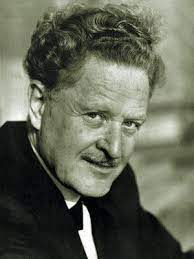

In [ ]:

nazimhikmet = """15 Ocak 1902’de Selanik’te doğdu. 3 Haziran 1963’te Moskova’da yaşamını yitirdi. Dedesi Mevlevi tarikatından Nâzım Paşa. Midhat Paşa’nın yakın arkadaşı. Babası Hikmet Bey, Mekteb-i Sultani (Galatasaray Lisesi) mezunu, Kalem-i Ecnebiye’ye bağlı bir memur. Annesi Celile Hanım, dilci, eğitimci Enver Paşa’nın kızı. İlkokuldan sonra arkadaşı Vâlâ Nurettin’le birlikte Mekteb-i Sultani’nin hazırlık sınıfına yazıldı. Ailesi parasal sıkıntıya düşünce ertesi yıl Nişantaşı Sultanisi’ne devam etti. Dedesi Nâzım Paşa’nın etkisiyle şiir yazmaya başladı. 1917’de Heybeliada Bahriye Mektebi’ne girdi. 1919’da mezun oldu, Hamidiye Kruvazörü’ne güverte subayı olarak atadı. Aynı yıl kış aylarında daha önce yakalandığı zatülcenp hastalığı tekrar etti. Sağlık kurulu raporuyla 1920’de askerlikten çıkarıldı. Bu sırada hececi şairler arasında genç bir ses olarak ünlendi. Bahriye Mektebi’nden öğretmeni olan Yahya Kemal Beyatlı’ya hayrandı. Yazdığı şiirleri gösterip eleştirilerini alıyordu. 1920’de Alemdar Gazetesi’nin düzenlediği yarışmada birincilik kazandı. Bu ödül ününü artırdı. İstanbul’un işgal altında olduğu günlerde heyecanlı direniş şiirleri yazdı. 1921’de arkadaşı Vâlâ Nurettin ile birlikte Ankara’ya gitti. İstanbul gençliğini milli mücadeleye katılmaya çağıran bir şiir yazdılar. Şiir çok beğenilince Bolu’ya öğretmen olarak atandılar. Bolu’da kalpaklı bu iki genç tepki gördü. Peşlerine gizli polis takıldı. Nâzım ile Vâlâ Nurettin Moskova’ya gitmeye karar verdiler. Batum üzerinden Moskova’ya ulaşıp “Doğu Emekçileri Komünist Üniversitesi”ne kaydoldular. Nâzım burada “serbest şiirle” tanıştı. İlk serbest şiirlerini yazdı. Bunlardan bazıları 1923’te Yeni Hayat, Aydınlık gibi dergilerde yayınlandı. Üniversiteyi bitirince 1924’te sınırdan gizlice geçerek Türkiye’ye girdi. Aydınlık dergisinde çalışmaya başladı. İzlendiğini anlayınca İzmir’e geçti. 1925’te Şeyh Sait isyanı nedeniyle başlatılan soruşturmalar sırasında gıyabında 15 yıla mahkum edildi. Tekrar yurtdışına kaçtı. 1926’da çıkan aftan yararlandırılmadı. Gizli örgüt üyesi olmak suçlamasıyla 3 ay daha hapse mahkum edildi. 1928’de Bakü’de ilk şiir kitabı “Güneşi İçenlerin Türküsü” basıldı. Aynı yıl yine gizlice Türkiye’ye döndü. Yakalanıp Ankara’ya götürüldü. Kısa bir tutukluluğun ardından serbest kaldı. İstanbul’da Zekeriya Sertel’in yayınladığı “Resimli Ay” dergisinin yazarları arasına katıldı. 1929’da “Putları Yıkıyoruz” başlığıyla bir yazı hazırlayıp Abdülhak Hamid Tarhan, Mehmet Emin Yurdakul gibi dönemin etkili şairlerine yönettiği saldırılar büyük ilgi gördü. “1929’da “835 Satır”, “Jokond ile Sİ-YA-U”, ertesi yıl “Varan 3+1+1=1” kitapları yayınlandı. 1930’da “Salkımsöğüt” ile “Bahri Hazer” şiirlerini Columbia firmasının girişimiyle plağa okudu. Plak halktan büyük ilgi görünce hakkında şiir kitapları nedeniyle dava açıldı. 1932’de “Benerci Kendini Niçin Öldürdü” ile “Gece Gelen Telgraf” kitapları basıldı. 1932’de “Kafatası”, 1933’te “Bir Ölü Evi” adlı oyunları İstanbul Şehir Tiyatrosu’nda sahnelendi.
1932’de bir bildiri nedeniyle başlatılan tutuklamalar sırasında gözaltına alındı. 1933’te Bursa Cezaevi’ne gönderildi. 5 yıl hapse mahkum oldu. Kısa bir süre tutuklu kalıp salıverildi. 1935’de Piraye Altınoğlu ile evlendi. Akşam gazetesinde “Orhan Selim” takma ismiyle fıkralar yazmaya başladı. Yine farklı isimlerle romanlar, oyunlar, operetler yazdı. 1935’te “Taranta Babu’ya Mektuplar” kitabı yayınlandı. “Unutulan Adam” oyunu şehir tiyatrolarında sahneye kondu. “Simavne Kadısı Oğlu Şeyh Bedrettin Destanı” kitabı 1936’da yayınlandı. 1938’de Harp Okulu öğrencilerini isyana teşvik suçlamasıyla bir kez daha tutuklandı. Ankara Cezaevi’ne kondu. 15 yıl hapse mahkum edildi. İstanbul Cezaevi’ne getirildi. Askeri Mahkeme’de de ayrıca yargılanıp bir 20 yıl hapse daha mahkum oldu. 1940’ta önce Çankırı ve sonra Bursa Cezaevi’ne kondu. 10 yılı aşkın cezaevlerinde kaldı. Yayınlatamamasına rağmen sürekli yazdı. Serbest bırakılması için başlatılan çabalar sonuç vermedi. 1950’de açlık grevine başladı. Sağlık durumu iyi olmadığı için İstanbul’da Cerrahpaşa Hastanesi’ne kaldırıldı. 1950’de yürürlüğe giren af yasasıyla tekrar özgürlüğüne kavuştu. Piraye Hanım’dan ayrılıp cezaevinde sürekli ziyaretine gelen dayısının kızı Münevver Andaç ile evlendi. Doğan oğullarına Mehmed adını verdiler. Sürekli izlendiğini anlayınca tekrar yurtdışına gitmeye karar verdi. 1951’de Karadeniz yoluyla Bulgaristan ve Romanya üzerinden Moskova’ya gitti.
25 Temmuz 1951’de Bakanlar Kurulu kararıyla Türkiye Cumhuriyeti vatandaşlığından çıkarıldı. Yurtdışında birçok uluslararası kongreye katıldı. Kitapları birçok dile çevrildi. 1959’da kendisinden 30 yaş küçük olan Rus Vera Tulyakova ile evlendi. 1963’te bir kalp krizi sonucu yaşamını yitirdi. Moskova’da Novodeviçiy Mezarlığı’nda toprağa verildi.İlk şiirlerini hece vezniyle yazdı. Ama içerik bakımından diğer hececi şairlerden uzaktı. Toplumsal içerikli bir şiir kurdu. Moskova’daki yıllarında özellikle geleçekçiliğin önemli isimlerinden Mayakovski’nin etkisiyle hece veznini bırakıp serbest şiire yöneldi. “835 Satır” kitabı yayınlandığında büyük şaşkınlık yarattı. Ama Ahmet Haşim, Yakup Kadri gibi şairler ondan övgüyle sözetti. Kendisini izleyen genç şairler de serbest şiire yöneldi. 1936’ya kadar yayınlanan kitaplarıyla Cumhuriyet dönemi şiirinin değerlerini kökünden sarstı. “Şeyh Bedrettin Destanı“nda ise şiirini tam anlamıyla bir ulusal bireşime ulaştırdı. Divan ve halk şiiri söyleyişlerini, çağdaş bir şiir anlayışı içinde eritti. En önemli eserlerinden “Memleketimden İnsan Manzaraları”nı 1941’de cezaevinde yazmaya başladı. 2’nci Meşruriyet’ten 2’nci Dünya Savaşı’na kadar uzanan geniş bir zaman diliminin öyküsünü bu eserinde destanlaştırdı. Düzyazı, şiir, senaryo tekniklerinin iç içe kullanıldığı bu eser, yeni bir türün habercisi oldu. Şiir kitapları 1938’den 1965’e kadar Türkiye’de basılamadı. Ancak, ölümünden iki yıl sonra 1965’ten itibaren yayınlanabildi."""

print(nlp(question="1917'de hangi okula girdi?", context = nazimhikmet))
print(nlp(question="Hangi şairler ondan övgüyle söz etti?", context = nazimhikmet))
print(nlp(question="Nazım Hikmet, ne zaman açlık grevine başladı?", context = nazimhikmet))


{'score': 0.8304238319396973, 'start': 554, 'end': 583, 'answer': 'Heybeliada Bahriye Mektebi’ne'}
{'score': 0.9998998641967773, 'start': 5098, 'end': 5122, 'answer': 'Ahmet Haşim, Yakup Kadri'}
{'score': 0.9994717240333557, 'start': 3960, 'end': 3967, 'answer': '1950’de'}


##Örnek2: Yapay Zeka - Bilim Teknik Metin
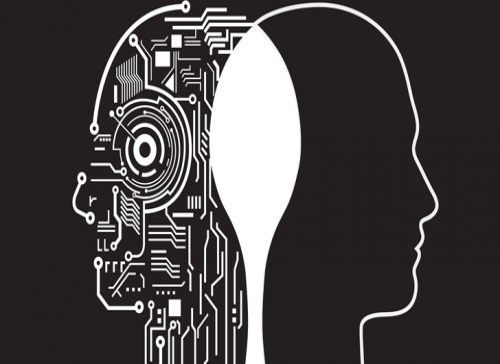

In [ ]:

yapayzeka = """Yapay zekâ (YZ, İngilizce: Artificial intelligence, AI), insanlar da dahil olmak üzere hayvanlar tarafından görüntülenen doğal zekânın aksine makineler tarafından görüntülenen zekâ çeşididir İlk ve ikinci kategoriler arasındaki ayrım genellikle seçilen kısaltmayla ortaya çıkar. "Güçlü" yapay zeka genellikle Yapay genel zekâ (İngilizce: Artificial General Intelligence kelimelerinin kısaltılmışı olarak: AGI) olarak etiketlenirken "doğal" zekayı taklit etme girişimleri yapay biyolojik zeka (İngilizce: Artificial Biological Intelligence: ABI) olarak adlandırılır. Önde gelen yapay zeka ders kitapları, alanı zeki etmenlerin çalışması olarak tanımlar: Çevresini algılayan ve hedeflerine başarıyla ulaşma şansını en üst düzeye çıkaran eylemleri gerçekleştiren herhangi bir cihaz. Halk arasında, "yapay zeka" terimi genellikle insanların insan zihni ile ilişkilendirdiği "öğrenme" ve "problem çözme" gibi "bilişsel" işlevleri taklit eden makineleri tanımlamak için kullanılır. 
Makineler gittikçe daha yetenekli hale geldikçe, "zeka" gerektirdiği düşünülen görevler genellikle AI etkisi olarak bilinen bir fenomen olan AI tanımından çıkarılır. Tesler'in Teoremindeki bir espri, "AI henüz yapılmamış şeydir" der. Örneğin, optik karakter tanıma AI olarak değerlendirilen şeylerin dışında tutulur, rutin teknoloji haline gelir. 
Genellikle yapay zeka olarak sınıflandırılan modern makine yetenekleri satranç ve Go gibi stratejik oyun sistemlerinde, en üst düzeyde rekabet eden insan konuşmasını anlama ve poker, kendi kendine giden arabalar gibi kusurlu-bilgi oyunlarını içerik dağıtım ağı 'ndaki akıllı yönlendirmeyi ve askeri simülasyonları kapsar. 
Yapay zekâ çalışmaları sıklıkla insanın düşünme yöntemlerini taklit eden yapay yöntemler geliştirmeye yöneliktir, ancak bununla sınırlı değildir. Öğrenebilen ve gelecekte insan zekâsından bağımsız gelişebilecek bir yapay zekâ kavramına doğru yeni yönelimler oluşmaktadır. Bu yönelim, insanın evreni ve doğayı anlama çabasında kendisine yardımcı olabilecek belki de kendisinden daha zeki, insan ötesi varlıklar meydana getirme düşünün bir ürünüdür. Bu düş, 1920'li yıllarda yazılan ve sonraları Isaac Asimov'u etkileyen modern bilimkurgu edebiyatının öncü yazarlarından Karel Čapek'in eserlerinde dışa vurmuştur. Karel Čapek, R.U.R adlı tiyatro oyununda yapay zekâya sahip robotlar ile insanlığın ortak toplumsal sorunlarını ele alarak 1920 yılında yapay zekânın insan aklından bağımsız gelişebileceğini öngörmüştür."""

print(nlp(question="Önde gelen yapay zeka ders kitapları, alanı nasıl tanımlar?", context = yapayzeka))
print(nlp(question="Yapay zeka olarak sınıflandırılan modern makine yetenekleri neleri kapsar?", context = yapayzeka))
print(nlp(question="Karel Čapek, hangi yılda yapay zekânın insan aklından bağımsız gelişebileceğini öngörmüştür?", context = yapayzeka))


{'score': 0.9399530291557312, 'start': 610, 'end': 635, 'answer': 'zeki etmenlerin çalışması'}
{'score': 0.0043824296444654465, 'start': 1624, 'end': 1638, 'answer': 'simülasyonları'}
{'score': 0.9582325220108032, 'start': 2383, 'end': 2387, 'answer': '1920'}


##Örnek3: Dali, Belleğin Azmi (La persistencia de la memoria) - Sanatsal Metin
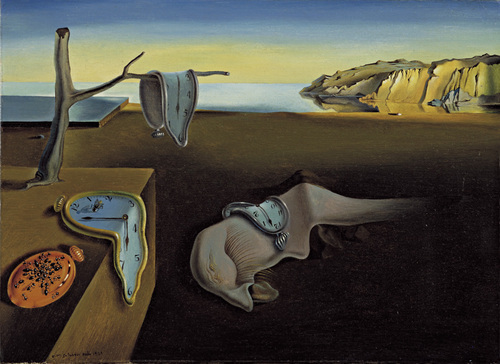

In [ ]:

dali = """Belleğin Azmi (La persistencia de la memoria), 1931 tarihli Salvador Dalí tablosu. 
Salvador Dalí’nin en ünlü tablolarından olan Belleğin Azmi, zaman zaman Yumuşak Saatler veya Eriyen Saatler olarak da anıldı. 
Bunun nedeni, ünlü sürrealistik eserde yumuşak, eriyen cep saatlerinin resmedilmiş olmasıdır. Eser bugün, New York City Museum of Modern Art’da (MoMA) sergilenmektedir. Tablo ilk kez 1932 yılında New York’ta sergilendi ve Salvador Dalí tarafından 250 $’a satıldı. Tablo, kısa bir zaman dilimi içinde Salvador Dalí’nin en tanınmış eseri oldu ve kartpostal, poster ve diğer şekillerde de kullanıldı. Ünlü gerçeküstücü tablo eriyen cep saatlerini konu almaktadır. Bu, Dalí’nin o yıllardaki ‘yumuşaklık’ ve ‘sertlik’ anlayışına ışık tutmaktadır. Yapıt her ne kadar Dalí’nin sanat yaşamındaki Freudçu evrenin bir örneği olsa da, sanatçının bilimsel evreye geçişinden 14 yıl önce yapılmıştır. Dalí’nin bilimsel temelli yapıtlar vermeye başlaması 1945 yılındaki atom bombası kullanımına dayanmaktadır. Tablonun ortasında “canavar” biçiminde bir insan figürü gözlenebilmektedir. 
Dalí’nin birçok yapıtında kullandığı bu nesne, sanatçının kendini betimlemesi olarak da algılanmaktadır. Resmin sol alt köşesindeki turuncu saat karıncalarla kaplanmıştır. Dalí; karınca görüngesini, ölümü ı simgelemek amacıyla da kullanmıştır."""

print(nlp(question="Eser nerede sergilenmektedir?", context = dali))
print(nlp(question="O yıllardaki hangi anlayışa ışık tutmaktadır?", context = dali))
print(nlp(question="Tablonun ortasında gözlenen nedir?", context = dali))


{'score': 0.6973812580108643, 'start': 317, 'end': 354, 'answer': 'New York City Museum of Modern Art’da'}
{'score': 0.4917520582675934, 'start': 699, 'end': 723, 'answer': 'yumuşaklık’ ve ‘sertlik’'}
{'score': 0.824795663356781, 'start': 1026, 'end': 1061, 'answer': 'canavar” biçiminde bir insan figürü'}
